Dimensiones del dataset: (1001, 12)

=== Información básica del dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   region   1001 non-null   object
 1   tenure   1001 non-null   object
 2   age      1001 non-null   object
 3   marital  1001 non-null   object
 4   address  1001 non-null   object
 5   income   1001 non-null   object
 6   ed       1001 non-null   object
 7   employ   1001 non-null   object
 8   retire   1001 non-null   object
 9   gender   1001 non-null   object
 10  reside   1001 non-null   object
 11  custcat  1001 non-null   object
dtypes: object(12)
memory usage: 94.0+ KB
None

=== Primeras 5 filas ===
   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0  region  tenure  age  marital  address  income  ed  employ  retire  gender   
1       2      13   44        1        9    64.0   4       5     0

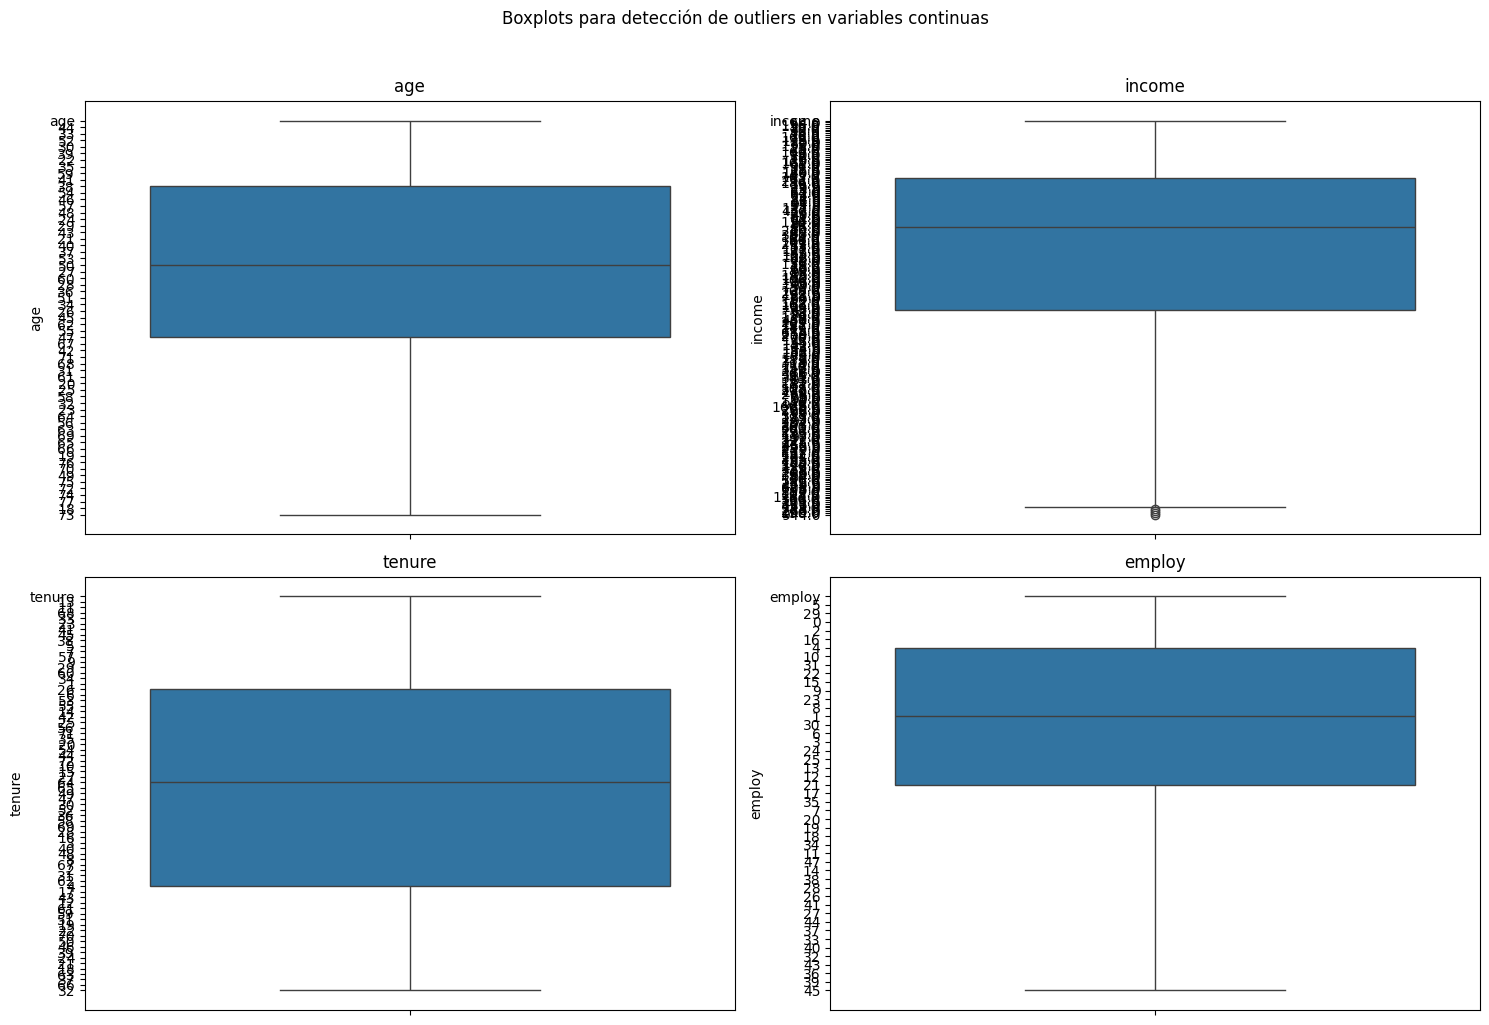

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [4]:
# Análisis Exploratorio de Datos (EDA)
# Proyecto: Digital Content - Generador de Contenido

# 1. Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# 2. Carga de datos
def load_data():
    # Cargamos los datos
    df = pd.read_csv('../data/teleCust1000t.csv')
    print("Dimensiones del dataset:", df.shape)
    return df

df = load_data()

# 3. Análisis inicial y exploración básica
def initial_exploration(df):
    print("\n=== Información básica del dataset ===")
    print(df.info())
    
    print("\n=== Primeras 5 filas ===")
    print(df.head())
    
    print("\n=== Estadísticas descriptivas ===")
    print(df.describe())
    
    print("\n=== Valores únicos por columna ===")
    for col in df.columns:
        print(f"{col}: {df[col].unique()}")
    
    print("\n=== Valores nulos ===")
    print(df.isnull().sum())

initial_exploration(df)

# 4. Análisis de valores atípicos (outliers)
def detect_outliers(df):
    plt.figure(figsize=(15, 10))
    plt.suptitle("Boxplots para detección de outliers en variables continuas", y=1.02)
    
    # Seleccionamos solo las variables continuas
    continuous_cols = ['age', 'income', 'tenure', 'employ']
    
    for i, column in enumerate(continuous_cols, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(y=df[column])
        plt.title(column)
    
    plt.tight_layout()
    plt.show()
    
    # Calculamos los outliers usando el método IQR
    outliers_dict = {}
    for column in continuous_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        outliers_dict[column] = len(outliers)
    
    print("\n=== Número de outliers por variable continua ===")
    for col, count in outliers_dict.items():
        print(f"{col}: {count} outliers")
    
    return outliers_dict

outliers = detect_outliers(df)

# 5. Análisis de distribuciones
def analyze_distributions(df):
    # Variables continuas
    continuous_cols = ['age', 'income', 'tenure', 'employ']
    
    plt.figure(figsize=(15, 10))
    plt.suptitle("Distribución de variables continuas", y=1.02)
    
    for i, column in enumerate(continuous_cols, 1):
        plt.subplot(2, 2, i)
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribución de {column}')
    
    plt.tight_layout()
    plt.show()
    
    # Test de normalidad para variables continuas
    print("\n=== Test de Normalidad (Shapiro-Wilk) ===")
    for column in continuous_cols:
        stat, p_value = stats.shapiro(df[column])
        print(f"{column}: p-value = {p_value:.4f}")

analyze_distributions(df)

# 6. Análisis de variables discretas
def discrete_analysis(df):
    discrete_cols = ['region', 'marital', 'ed', 'retire', 'gender', 'reside', 'custcat']
    
    fig = plt.figure(figsize=(15, 12))
    plt.suptitle("Distribución de variables discretas", y=1.02)
    
    for i, column in enumerate(discrete_cols, 1):
        plt.subplot(3, 3, i)
        value_counts = df[column].value_counts().sort_index()
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Distribución de {column}')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Análisis bivariado con la variable objetivo (custcat)
    print("\n=== Análisis de variables discretas vs custcat ===")
    for col in discrete_cols[:-1]:  # Excluimos custcat
        print(f"\nTabla de contingencia para {col}:")
        print(pd.crosstab(df[col], df['custcat']))
        
        # Chi-square test de independencia
        chi2, p_value = stats.chi2_contingency(pd.crosstab(df[col], df['custcat']))[:2]
        print(f"Chi-square test p-value: {p_value:.4f}")

discrete_analysis(df)

# 7. Análisis de correlaciones
def correlation_analysis(df):
    # Matriz de correlación
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Matriz de Correlación')
    plt.show()
    
    # Identificar correlaciones fuertes
    print("\n=== Correlaciones más fuertes (|corr| > 0.5) ===")
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > 0.5:
                print(f"{correlation_matrix.index[i]} - {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")

correlation_analysis(df)

# 8. Feature Engineering y Preprocesamiento
def preprocess_data(df):
    # Crear copia del dataframe original
    df_processed = df.copy()
    
    # 1. Feature engineering
    # Ratio income/employ (ingreso por año de empleo)
    df_processed['income_per_year_employed'] = df_processed['income'] / (df_processed['employ'] + 1)
    
    # Categorización de edad
    df_processed['age_category'] = pd.cut(df_processed['age'], 
                                        bins=[0, 30, 50, 70, 100],
                                        labels=['Young', 'Middle', 'Senior', 'Elderly'])
    
    # Ratio income/edad (ingreso relativo a la edad)
    df_processed['income_age_ratio'] = df_processed['income'] / df_processed['age']
    
    # 2. Normalización de variables continuas
    scaler = StandardScaler()
    continuous_cols = ['age', 'income', 'employ', 'tenure']
    df_processed[continuous_cols] = scaler.fit_transform(df_processed[continuous_cols])
    
    return df_processed

df_processed = preprocess_data(df)

# Mostrar las primeras filas del dataset procesado
print("\n=== Primeras filas del dataset procesado ===")
print(df_processed.head())

# 9. Resumen final y recomendaciones
def print_summary():
    print("\n=== RESUMEN DEL ANÁLISIS Y RECOMENDACIONES ===")
    print("""
    1. Calidad de los datos:
       - No se encontraron valores nulos en el dataset
       - Se identificaron outliers principalmente en las variables income y employ
       - Todas las variables discretas ya están codificadas numéricamente
    
    2. Distribución de variables:
       - Las variables continuas no siguen una distribución normal
       - Algunas variables discretas muestran desbalance en sus categorías
    
    3. Correlaciones y relaciones:
       - Se encontraron correlaciones significativas entre algunas variables
       - Las variables discretas muestran dependencia estadística con la variable objetivo
    
    4. Preprocesamiento realizado:
       - Normalización de variables continuas
       - Creación de nuevas características:
         * income_per_year_employed
         * age_category
         * income_age_ratio
    
    Recomendaciones para el modelado:
    1. Considerar técnicas de tratamiento de outliers para las variables continuas
    2. Evaluar técnicas de balanceo para las categorías menos representadas
    3. Usar validación cruzada estratificada debido a la distribución desigual de las clases
    4. Considerar el uso de modelos no paramétricos debido a la no normalidad de las variables
    5. Evaluar la importancia de las nuevas características creadas en el modelado
    """)

print_summary()